In [273]:
from pathlib import Path
from lagom.experiment import Configurator

from lagom.utils import pickle_load

from lagom.vis import CurvePlot

In [385]:
item = 'env.time_aware_obs'
log_folder = Path(f'logs.{item}/')

list_config = pickle_load(log_folder/'configs.pkl')
configs = Configurator.to_dataframe(list_config)
configs

,ID,cuda,env.id,env.standardize,env.time_aware_obs,network.recurrent,network.hidden_sizes,network.independent_V,algo.lr,algo.lr_V,...,agent.init_std,train.timestep,train.N,train.ratio_T,eval.independent,eval.N,train.batch_size,train.num_epochs,log.interval,log.dir
0,0,True,HalfCheetah-v2,True,True,False,"[64, 64]",True,0.0003,0.001,...,0.5,1000000.0,2,1.0,False,10,256,80,10,logs.env.time_aware_obs


In [386]:
def load_loggings(log_folder, ID, f):
    p = Path(log_folder)/str(ID)
    
    out = []
    for seed_folder in p.iterdir():
        if seed_folder.is_dir() and (seed_folder/f).exists():
            out.append(pickle_load(seed_folder/f))
            
    return out


def get_items(loggings, key):
    out = []
    
    for logging in loggings:
        items = [x[key][0] for x in logging]
        out.append(items)
        
    return out

In [356]:
env_id = configs['env.id'][0]

plot = CurvePlot()
x_key = 'accumulated_trained_timesteps'
y_key = 'running_mean_return'
#y_key = 'value_loss'

In [351]:
loggings = load_loggings(log_folder, 0, 'train_logs.pkl')
x = get_items(loggings, x_key)
y = get_items(loggings, y_key)
plot.add(f'PPO - network.independent_V: True', y, xvalues=x)

In [352]:
loggings = load_loggings(log_folder, 1, 'train_logs.pkl')
x = get_items(loggings, x_key)
y = get_items(loggings, y_key)
plot.add(f'PPO - network.independent_V: False', y, xvalues=x)

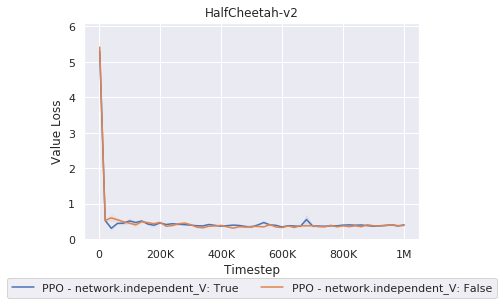

In [353]:
#plot.add('PPO', [f(y, window_length=51, polyorder=10) for y in y_values], xvalues=x_values)
ax = plot(title=f'{env_id}', 
          xlabel='Timestep', 
          ylabel='Value Loss', 
          num_tick=6, 
          xscale_magnitude=None, 
          scales=[0.5], 
          alphas=[0.1])
ax.legend(loc='upper center', bbox_to_anchor=[0.5, -0.15], ncol=2)

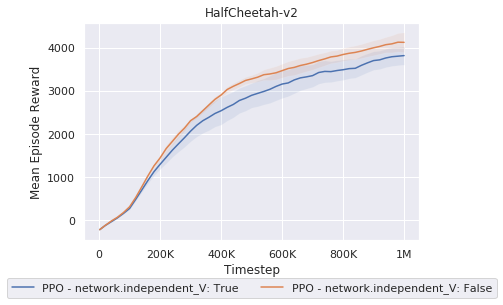

In [344]:
#plot.add('PPO', [f(y, window_length=51, polyorder=10) for y in y_values], xvalues=x_values)
ax = plot(title=f'{env_id}', 
          xlabel='Timestep', 
          ylabel='Mean Episode Reward', 
          num_tick=6, 
          xscale_magnitude=None, 
          scales=[0.5], 
          alphas=[0.1])
ax.legend(loc='upper center', bbox_to_anchor=[0.5, -0.15], ncol=2)

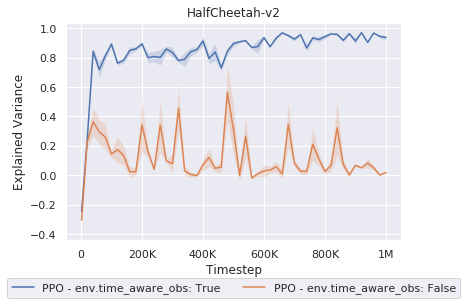

In [404]:
env_id = configs['env.id'][0]

plot = CurvePlot()
x_key = 'accumulated_trained_timesteps'
#y_key = 'running_mean_return'
y_key = 'explained_variance'

for ID in [0]:
    loggings = load_loggings(log_folder, ID, 'train_logs.pkl')
    x = get_items(loggings, x_key)
    y = get_items(loggings, y_key)
    plot.add(f'PPO - {item}: {configs.iloc[ID][item]}', y, xvalues=x)
    
    
    
loggings = load_loggings('logs.network.independent_V', 0, 'train_logs.pkl')
x = get_items(loggings, x_key)
y = get_items(loggings, y_key)
plot.add(f'PPO - env.time_aware_obs: False', y, xvalues=x)
    
    
    
    
#plot.add('PPO', [f(y, window_length=51, polyorder=10) for y in y_values], xvalues=x_values)
ax = plot(title=f'{env_id}', 
          xlabel='Timestep', 
          ylabel='Mean Episode Reward', 
          num_tick=6, 
          xscale_magnitude=None, 
          scales=[0.5], 
          alphas=[0.2])
ax.legend(loc='upper center', bbox_to_anchor=[0.5, -0.15], ncol=2)

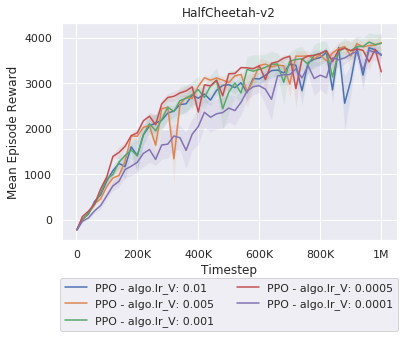

In [384]:
env_id = configs['env.id'][0]

plot = CurvePlot()
x_key = 'accumulated_trained_timesteps'
y_key = 'online_mean_return'
#y_key = 'explained_variance'

for ID in [0, 1, 2, 3, 4]:
    loggings = load_loggings(log_folder, ID, 'train_logs.pkl')
    x = get_items(loggings, x_key)
    y = get_items(loggings, y_key)
    plot.add(f'PPO - {item}: {configs.iloc[ID][item]}', y, xvalues=x)
    
#plot.add('PPO', [f(y, window_length=51, polyorder=10) for y in y_values], xvalues=x_values)
ax = plot(title=f'{env_id}', 
          xlabel='Timestep', 
          ylabel='Mean Episode Reward', 
          num_tick=6, 
          xscale_magnitude=None, 
          scales=[0.5], 
          alphas=[0.1])
ax.legend(loc='upper center', bbox_to_anchor=[0.5, -0.15], ncol=2)

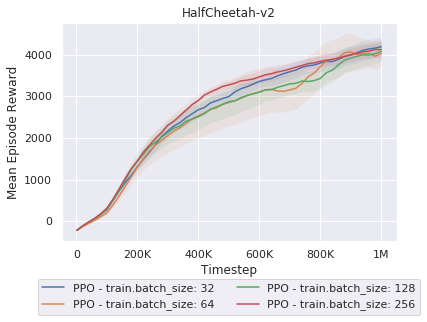

In [331]:
#plot.add('PPO', [f(y, window_length=51, polyorder=10) for y in y_values], xvalues=x_values)
ax = plot(title=f'{env_id}', 
          xlabel='Timestep', 
          ylabel='Mean Episode Reward', 
          num_tick=6, 
          xscale_magnitude=None, 
          scales=[0.5], 
          alphas=[0.1])
ax.legend(loc='upper center', bbox_to_anchor=[0.5, -0.15], ncol=2)

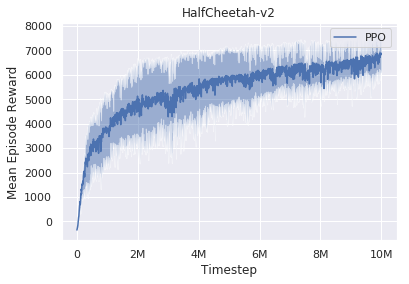

In [116]:
plot = CurvePlot()
plot.add('PPO', y_values, xvalues=x_values)
#plot.add('PPO', [f(y, window_length=51, polyorder=10) for y in y_values], xvalues=x_values)
ax = plot(title=env_id, 
          xlabel='Timestep', 
          ylabel='Mean Episode Reward', 
          num_tick=6, 
          xscale_magnitude=None)